In [ ]:
# Import libraries
import nglview, ipymd, MDAnalysis, mdtraj       # trajectory analysis libraries
import pyemma               # Markov model analysis

# import gromacs
# from Bio.PDB import PDBList

import datetime
now = datetime.datetime.now()

from sys import argv

# gromacs.config.setup() # UNCOMMENT if not yet setup on your system!
# print("GMX version:",gromacs.release(),"\n")
# help(gromacs.pdb2gmx)

# TRAJECTORY ANALYSIS

This notebook analyses an MD trajectory with several tools.

In [ ]:
# Download the PDB target
import pypdb

# Define the analysis datapath
def now_dir_ts():
    now_ts = str(now.year)+"_"+str(now.month)+"_"+str(now.day)+"_"+str(now.hour)+"_"+str(now.minute)+"_"+str(now.second)
    return now_ts

ana_dir = "/Users/jacobnorth/Box/extracurriculars/research/SURE_S2020_fileshare/sure_data/"+input("Please enter a sub-directory of sure_data/:")+"/mdana_"+now_dir_ts()

print(ana_dir)      # Print the simulation datapath

In [ ]:
# id = input("Please enter a PDB ID to simulate:")
# pdbl = PDBList()            # Create a PDBList object 
# pdbl.retrieve_pdb_file(id, file_format='pdb', pdir=ana_dir)       # Retrieve the PDB file in PDB format
# pypdb.get_pdb_file('1oca', filetype='PDB')      # Search and download on PDB

# MDTraj Intro analysis

In [ ]:
ana_dir = '/Users/jacobnorth/Box/extracurriculars/research/SURE_S2020_fileshare/sure_data/1aki/mdsim_2020_6_24_15_44_SHELLSCRIPT/'

import mdtraj as md
# t = md.load('trajectory.xtc', top='trajectory.pdb')
t = md.load(ana_dir+'em.trr', top=ana_dir+'em.gro')
print(t)

In [ ]:
import numpy as np

# Print basic info about the trajectory 
print("Trajectory dimensions:\t", t.xyz.shape)      # Traj dimensions
print("Trajectory mean dims:\t", np.mean(t.xyz))
print("l_unitcell for last frame:\t", t.unitcell_lengths[-1])


In [ ]:
# Save the trajectory back to the disk with a hd5 format
# t[::2].save('halftraj.h5')

In [ ]:
# If you only wish to keep the c-alpha atoms (CA), ...
# atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
# t.restrict_atoms(atoms_to_keep)  # this acts inplace on the trajectory
# t.save('CA-only.h5')

# Atom selection

In [ ]:
print('How many atoms?    %s' % t.n_atoms)
print('How many res+solv? %s' % t.n_residues)

In [ ]:
topology = t.topology
print(topology)

In [ ]:
print('Fifth atom: %s' % topology.atom(4))
print('All atoms: %s' % [atom for atom in topology.atoms])

In [ ]:
print('Second residue: %s' % t.topology.residue(1))
print('All residues: %s' % [residue for residue in t.topology.residues])

In [29]:
# Identify an atom of interest
atom = topology.atom(10)
print('''Hi! I am the %sth atom, and my name is %s. 
I am a %s atom with %s bonds. 
I am part of an %s residue.''' % ( atom.index, atom.name, atom.element.name, atom.n_bonds, atom.residue.name))

Hi! I am the 10th atom, and my name is HG3. 
I am a hydrogen atom with 1 bonds. 
I am part of an LYS residue.


In [30]:
# Print ALL Carbon atoms in the structure
print([atom.index for atom in topology.atoms if atom.element.symbol is 'C' and atom.is_sidechain])

[6, 9, 12, 15, 28, 30, 34, 44, 47, 48, 50, 52, 54, 56, 71, 74, 77, 82, 95, 105, 108, 111, 120, 123, 125, 129, 139, 149, 159, 169, 172, 176, 186, 189, 192, 195, 208, 211, 214, 219, 232, 235, 237, 239, 256, 259, 261, 265, 275, 278, 287, 290, 301, 304, 305, 307, 309, 311, 313, 322, 325, 328, 333, 353, 356, 357, 359, 361, 363, 365, 374, 385, 388, 390, 394, 411, 414, 425, 428, 429, 431, 434, 435, 437, 439, 441, 449, 451, 455, 465, 475, 485, 495, 498, 501, 504, 517, 520, 521, 523, 525, 527, 529, 537, 540, 543, 552, 563, 566, 577, 580, 581, 583, 585, 587, 589, 597, 600, 611, 615, 625, 628, 631, 642, 652, 656, 666, 669, 680, 683, 686, 691, 704, 707, 718, 722, 732, 735, 751, 762, 766, 776, 779, 788, 791, 792, 794, 796, 798, 800, 816, 818, 821, 825, 835, 838, 840, 844, 854, 857, 860, 871, 873, 876, 880, 890, 893, 904, 915, 918, 921, 926, 939, 942, 943, 945, 948, 949, 951, 953, 955, 963, 966, 967, 969, 972, 973, 975, 977, 979, 987, 997, 1000, 1011, 1014, 1030, 1033, 1036, 1041, 1054, 1058, 1067, 

In [31]:
# Print only the even residues in the first chain...?
print([residue for residue in topology.chain(0).residues if residue.index % 2 == 0])

58, HOH6560, HOH6562, HOH6564, HOH6566, HOH6568, HOH6570, HOH6572, HOH6574, HOH6576, HOH6578, HOH6580, HOH6582, HOH6584, HOH6586, HOH6588, HOH6590, HOH6592, HOH6594, HOH6596, HOH6598, HOH6600, HOH6602, HOH6604, HOH6606, HOH6608, HOH6610, HOH6612, HOH6614, HOH6616, HOH6618, HOH6620, HOH6622, HOH6624, HOH6626, HOH6628, HOH6630, HOH6632, HOH6634, HOH6636, HOH6638, HOH6640, HOH6642, HOH6644, HOH6646, HOH6648, HOH6650, HOH6652, HOH6654, HOH6656, HOH6658, HOH6660, HOH6662, HOH6664, HOH6666, HOH6668, HOH6670, HOH6672, HOH6674, HOH6676, HOH6678, HOH6680, HOH6682, HOH6684, HOH6686, HOH6688, HOH6690, HOH6692, HOH6694, HOH6696, HOH6698, HOH6700, HOH6702, HOH6704, HOH6706, HOH6708, HOH6710, HOH6712, HOH6714, HOH6716, HOH6718, HOH6720, HOH6722, HOH6724, HOH6726, HOH6728, HOH6730, HOH6732, HOH6734, HOH6736, HOH6738, HOH6740, HOH6742, HOH6744, HOH6746, HOH6748, HOH6750, HOH6752, HOH6754, HOH6756, HOH6758, HOH6760, HOH6762, HOH6764, HOH6766, HOH6768, HOH6770, HOH6772, HOH6774, HOH6776, HOH6778, HOH678

In [32]:
# Select atoms in the first two residues
print(topology.select('resid 1 to 2'))

[24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


In [33]:
# Print all nitrogen atoms in the structure
print(topology.select('name N and backbone'))

[   0   24   40   60   67   91  101  116  135  145  155  165  182  204
  228  245  252  271  283  297  318  342  349  370  381  400  407  421
  445  461  471  481  491  513  533  548  559  573  593  607  621  638
  648  662  676  700  714  728  740  747  758  772  784  805  812  831
  850  867  886  900  911  935  959  983  993 1007 1019 1026 1050 1064
 1078 1085 1096 1120 1134 1153 1163 1177 1196 1210 1220 1231 1241 1260
 1279 1290 1301 1313 1332 1346 1356 1367 1383 1397 1407 1417 1439 1461
 1480 1496 1507 1519 1526 1540 1547 1564 1578 1588 1612 1628 1638 1662
 1686 1700 1724 1734 1756 1763 1777 1789 1805 1822 1832 1856 1875 1899
 1906 1916 1940]


In [34]:
# Select CA atoms in the first two residues, show the code that does this!
selection = topology.select_expression('name CA and resid 1 to 2')
print(selection)

[atom.index for atom in topology.atoms if (atom.name == 'CA' and 1 <= atom.residue.index <= 2)]


# Baker-Hubbard Hydrogen Bond Identification

In [35]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import mdtraj.testing

In [38]:
t = md.load_pdb('http://www.rcsb.org/pdb/files/1oca.pdb')
print(t)

<mdtraj.Trajectory with 20 frames, 2503 atoms, 165 residues, without unitcells>


In [39]:
hbonds = md.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

ASN3-ND2 -- VAL2-O
ASN3-ND2 -- ASN3-N
ASN3-ND2 -- ASP27-OD2
ASN3-ND2 -- ASP27-OD1
ASN3-ND2 -- ASP27-OD2
VAL6-N -- PHE22-O
PHE7-N -- GLY162-O
PHE8-N -- VAL20-O
ASP9-N -- ASP160-O
ILE10-N -- GLY18-O
ALA11-N -- THR157-O
VAL12-N -- GLU15-O
ASP13-N -- LYS155-O
GLU15-N -- VAL12-O
LEU17-N -- ILE10-O
GLY18-N -- ILE10-O
ARG19-NE -- ASP9-OD1
ARG19-NH1 -- ASP9-OD1
ARG19-NH2 -- ASP9-OD1
VAL20-N -- PHE8-O
SER21-N -- GLU134-O
PHE22-N -- VAL6-O
GLU23-N -- LYS131-O
LEU24-N -- PRO4-O
PHE25-N -- PHE129-O
ALA26-N -- LEU24-O
ASP27-N -- ASN3-OD1
ASP27-N -- ASN3-ND2
ASP27-N -- ASP27-OD1
LYS28-N -- PHE25-O
LYS28-NZ -- ASP27-OD2
VAL29-N -- PHE25-O
LYS31-N -- GLU86-OE1
LYS31-N -- GLU86-OE2
THR32-N -- GLU86-OE1
THR32-N -- GLU86-OE2
ALA33-N -- VAL29-O
GLU34-N -- PRO30-O
ASN35-N -- LYS31-O
ASN35-ND2 -- THR32-O
ASN35-ND2 -- ASN35-O
ASN35-ND2 -- GLY109-O
PHE36-N -- THR32-O
ARG37-N -- ALA33-O
ARG37-NE -- GLU34-OE2
ARG37-NH1 -- GLN163-OE1
ARG37-NH1 -- GLU34-OE2
ARG37-NH2 -- GLU34-OE2
ALA38-N -- GLU34-O
LEU39-N -- ASN

In [40]:
da_distances = md.compute_distances(t, hbonds[:, [0,2]], periodic=False)

Text(0.5, 0, 'Donor-acceptor distance [nm]')

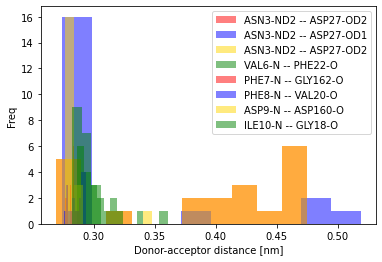

In [49]:
color = itertools.cycle(['r', 'b', 'gold','g'])
# for i in hbonds:
for i in [2,3,4,5,6,7,8,9]:
    plt.hist(da_distances[:, i], color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')